In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os.path as path
import pickle
import glob
def save(filename,model):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(model, output, pickle.HIGHEST_PROTOCOL)

def load(filename):
    with open(filename, 'rb') as input:  # Overwrites any existing file.
        model = pickle.load(input)
        return model

In [2]:
files1 = glob.glob('/scratch/mdd423/CNN_EPRV/data/peg51_256/*.h5')
filename             = files1[0]
dir_name, tailname = path.split(filename)
tailname = tailname[:-3]
imgname = path.join(dir_name, tailname + '_img.nda')
rvsname = path.join(dir_name, tailname + '_rvs.nda')
bcsname = path.join(dir_name, tailname + '_bcs.nda')
timname = path.join(dir_name, tailname + '_tim.nda')
# print(imgname,rvsname)

In [3]:
tlname = path.join(dir_name, tailname + '_tl_bcs.nda')
vlname = path.join(dir_name, tailname + '_vl_bcs.nda')
train_loss = load(tlname)
valid_loss = load(vlname)

In [4]:
tlname = path.join(dir_name, tailname + '_tl_bcs+rvs.nda')
vlname = path.join(dir_name, tailname + '_vl_bcs+rvs.nda')
train_loss_bcs_rv = load(tlname)
valid_loss_bcs_rv = load(vlname)

In [5]:
tlname = path.join(dir_name, tailname + '_tl_bcs-rvs.nda')
vlname = path.join(dir_name, tailname + '_vl_bcs-rvs.nda')
train_loss_bcs_min_rv = load(tlname)
valid_loss_bcs_min_rv = load(vlname)

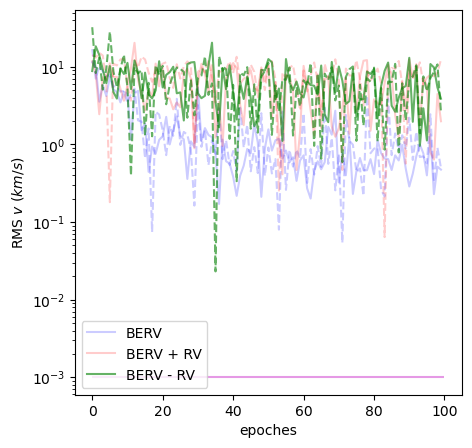

In [6]:
fig, ax = plt.subplots(1,figsize=(5,5))

plt.plot(np.sqrt(train_loss),'-b',alpha=0.2,label='BERV')
plt.plot(np.sqrt(valid_loss),'--b',alpha=0.2)

plt.plot(np.sqrt(train_loss_bcs_rv),'-r',alpha=0.2,label='BERV + RV')
plt.plot(np.sqrt(valid_loss_bcs_rv),'--r',alpha=0.2)

plt.plot(np.sqrt(train_loss_bcs_min_rv),'-g',alpha=0.6,label='BERV - RV')
plt.plot(np.sqrt(valid_loss_bcs_min_rv),'--g',alpha=0.6)
# plt.ylim(0,50)
plt.legend()
ax.set_ylabel('RMS $v$ ($km/s$)')
ax.set_xlabel('epoches')
plt.hlines(1e-3,0,len(train_loss),'m',alpha=0.4)
plt.yscale('log')
# plt.savefig(path.join(dir_name, tailname + '_loss_bcs-rvs.png'))
plt.show()

In [36]:
img_stack = load(imgname)
rvs_stack = load(rvsname)
bcs_stack = load(bcsname)
tim_stack = load(timname)

In [37]:
import astropy.time as at

In [38]:
tim_stack[0]

<Time object: scale='utc' format='isot' value=2013-06-08T08:04:03.052>

In [39]:
mjd_stack = []
for x in tim_stack:
    mjd_stack.append(x.mjd)
mjd_stack = np.array(mjd_stack)

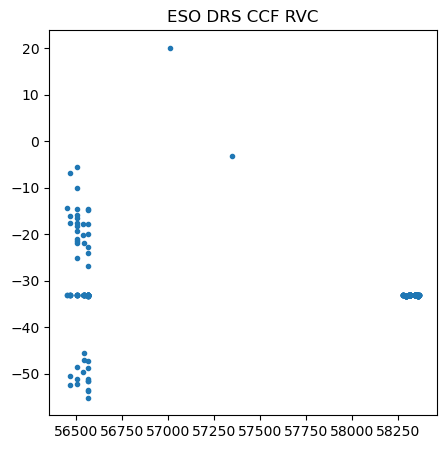

In [40]:
fig, ax = plt.subplots(1,figsize=(5,5))
ax.plot(mjd_stack,rvs_stack,'.')
plt.title('ESO DRS CCF RVC')
plt.show()

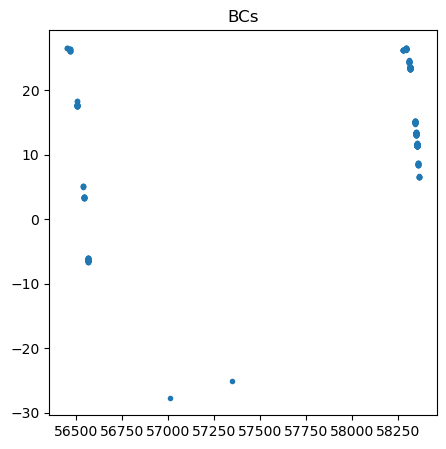

In [30]:
fig, ax = plt.subplots(1,figsize=(5,5))
ax.plot(mjd_stack,bcs_stack,'.')
plt.title('BCs')
plt.show()

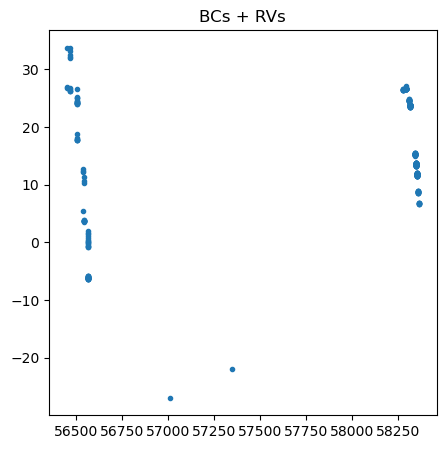

In [31]:
fig, ax = plt.subplots(1,figsize=(5,5))
ax.plot(mjd_stack,bcs_stack + rvs_stack,'.')
plt.title('BCs + RVs')
plt.show()

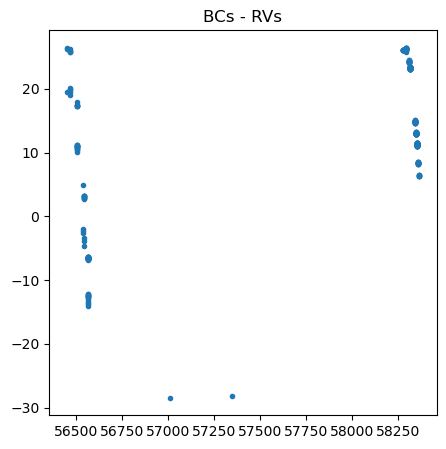

In [32]:
fig, ax = plt.subplots(1,figsize=(5,5))
ax.plot(mjd_stack,bcs_stack - rvs_stack,'.')
plt.title('BCs - RVs')
plt.show()

In [12]:
files1

['/scratch/mdd423/CNN_EPRV/data/peg51_256/51Peg_0-256_1200-1456.h5']

In [13]:
import h5py as h5

In [14]:
ds = h5.File(filename, 'r')

In [15]:
for x,v in ds.items():
    print(x,v)

images <HDF5 group "/images" (691 members)>
visits <HDF5 group "/visits" (311 members)>


In [35]:
for x,v in ds['visits'].items():
    print(x,v.attrs['ESO DRS CCF RVC'])

HARPS.2013-06-08T08:04:03.052 -33.1460221100532
HARPS.2013-06-08T08:11:35.239 -14.3452900419913
HARPS.2013-06-08T08:19:06.826 -33.1468391813668
HARPS.2013-06-25T06:50:16.144 -50.5280303909004
HARPS.2013-06-25T06:59:57.608 -33.1433905637834
HARPS.2013-06-25T07:11:54.202 -15.9941125554015
HARPS.2013-06-25T07:22:47.000 -33.14092283063
HARPS.2013-06-25T09:52:03.446 -17.5387645626165
HARPS.2013-06-25T10:01:32.831 -52.5120605432604
HARPS.2013-06-25T10:11:00.055 -33.1311783147492
HARPS.2013-06-25T10:19:52.107 -33.1312409715356
HARPS.2013-06-25T10:28:44.098 -6.89489218973859
HARPS.2013-06-25T10:38:12.732 -33.1318871595211
HARPS.2013-08-02T07:37:59.539 -48.4683966656209
HARPS.2013-08-02T07:48:31.208 -33.1460050396458
HARPS.2013-08-04T06:29:16.861 -52.3036560876082
HARPS.2013-08-04T06:38:08.953 -18.2007055697684
HARPS.2013-08-04T06:47:00.595 -15.8469140751411
HARPS.2013-08-04T06:55:53.066 -33.1478234005894
HARPS.2013-08-04T07:04:45.138 -14.6397113651025
HARPS.2013-08-04T07:13:37.080 -25.07835481